In [37]:
using Plots
using CSV
using DataFrames
using GLM

In [55]:
# Read CSV
boston = DataFrame(CSV.File("./data/housing.csv"))
# boston = CSV.read("./data/housing.csv", DataFrame) # 同義

,RM,LSTAT,PTRATIO,MEDV
,Float64,Float64,Float64,Float64
1,6.575,4.98,15.3,504000.0
2,6.421,9.14,17.8,453600.0
3,7.185,4.03,17.8,728700.0
4,6.998,2.94,18.7,701400.0
5,7.147,5.33,18.7,760200.0
6,6.43,5.21,18.7,602700.0
7,6.012,12.43,15.2,480900.0
8,6.172,19.15,15.2,569100.0
9,5.631,29.93,15.2,346500.0


In [60]:
# 基本統計量
describe(boston)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Float64,Float64,Float64,Int64,DataType
1,RM,6.24029,3.561,6.185,8.398,0,Float64
2,LSTAT,12.9396,1.98,11.69,37.97,0,Float64
3,PTRATIO,18.5166,12.6,19.1,22.0,0,Float64
4,MEDV,4.54343e5,105000.0,438900.0,1.0248e6,0,Float64


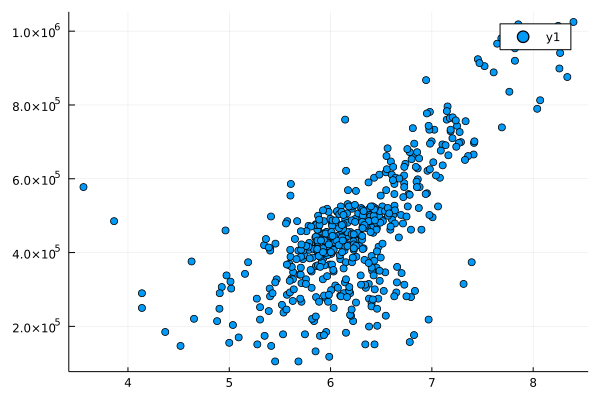

In [61]:
# 可視化
plot(boston.RM, boston.MEDV, st=:scatter)

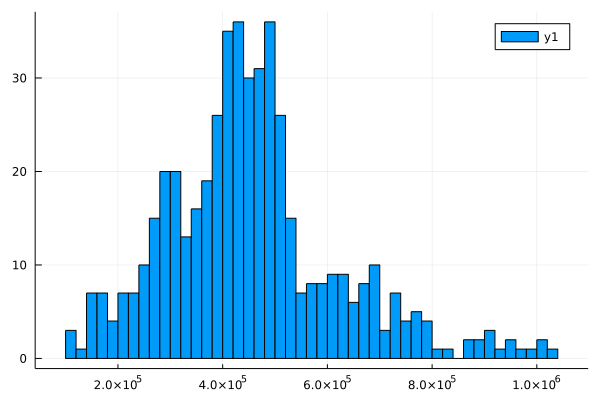

In [71]:
# 可視化
plot(boston.MEDV, st=:hist, bin=50)

In [79]:
# 線形回帰の実行
ols = lm(@formula(MEDV ~ RM + LSTAT	+ PTRATIO), boston)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

MEDV ~ 1 + RM + LSTAT + PTRATIO

Coefficients:
─────────────────────────────────────────────────────────────────────────────────────────
                      Coef.  Std. Error       t  Pr(>|t|)       Lower 95%       Upper 95%
─────────────────────────────────────────────────────────────────────────────────────────
(Intercept)       4.15464e5   68845.7      6.03    <1e-08       2.80192e5       5.50737e5
RM            86565.2          7888.89    10.97    <1e-24   71064.6             1.02066e5
LSTAT        -10849.3           732.138  -14.82    <1e-40  -12287.9         -9410.79
PTRATIO      -19492.1          2039.05    -9.56    <1e-19  -23498.6        -15485.7
─────────────────────────────────────────────────────────────────────────────────────────

In [80]:
# 回帰係数の取得
coef(ols)

4-element Vector{Float64}:
 415464.3965164924
  86565.23613301323
 -10849.34038380381
 -19492.11563514459

In [82]:
pred = predict(ols)

489-element Vector{Float64}:
 632371.7397619993
 525177.1483130299
 646753.1180798893
 624848.2958697319
 611816.5925362597
 551051.2390749458
 504757.13752328884
 445700.00792540924
 281912.32584004407
 453398.19604186073
 449341.7388337321
 495383.99589249457
 458523.7770200517
      ⋮
 406758.82983005885
 341092.2744409542
 278447.3433650449
 389799.0550647612
 422078.4548475777
 359472.5365510293
 407473.4067954784
 471941.44849202933
 437397.20262755826
 548818.7756777027
 523950.4567790993
 442625.53983615176

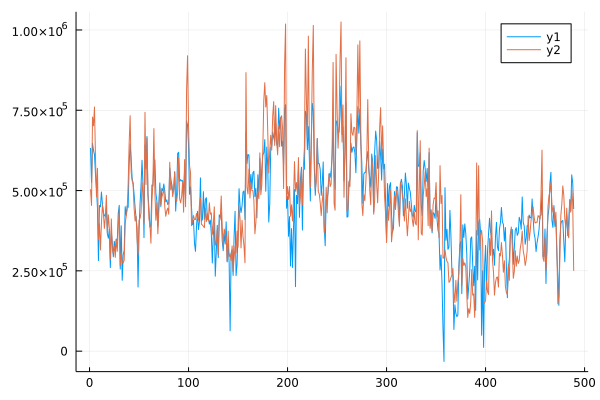

In [86]:
plot(pred)
plot!(boston.MEDV) # !でグラフを重ねる

In [ ]:
#= その他のモデル
ロジスティック回帰
logit = glm(@formula(Y ~ X), data, Binomial(), ProbitLink())
ポアソン回帰
poisson = fit(@formula(Y ~ X), data, Poisson(), LogLink())
=#